# Credit Card Fraud Detection - Capstone Project

# Business Understanding

Purchases made through websites or in situ stores represent an imminent danger to credit/debit cardholders throughout the world, given their exposure to cybernetic dangers that may generate unrecognized fraud transactions.
Thus, it is important to generate a trustworthy AI model that detects potential threats based on transaction datasets collected on a daily-basis routine.

This applies particularly to the finance industry, with an emphasis on the fraud monitoring techniques that are implemented on a bigger scale at banks worldwide.

The main focus of this project is to demonstrate how a bank can detect frauds based on your daily financial activities.

# Data Understanding

The collected dataset consists of a CVS type file with transactions made by credit cards in September 2013 by European cardholders.

Data was obtained data through a direct download form the Kaggle website, result of an extensive search of machine learning datasets. The web link to this dataset is: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

We must import the data from the downloaded file 'creditcard.csv'. To do so, we must import the Python Pandas library and use the read_csv() function.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


This dataset consists of numerical input variables only. Most features (V1 to V28) are the result of PCA transformation of the original features due to confidentiality issues; the rest (‘Time’, ‘Amount’ and 'Class') haven’t been modified at all.

Next, it is necessary to know which type of data we are dealing with in case there are some N/A values to be deleted/substituted with Measures of Central Tendency (MCT) or non-numerical categories required to be encoded.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [48]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


There are non-null values in this dataset, which means no method to delete or fill N/A values with mean (for numerical variables) or mode (for ctageorical variables) are necessary at all. 29 features consist of float-type data and only the 'Class' category is an integer, given the 1 or 0 values that identify if a transaction is an authentic fraud or not.

By observing the MCT values for all features and label, it will be necessary to standarize all data so we can obtain more reliable results. For most features, it is evident that the unit variation is considerably different: 'Time' exceeds the thousand units; V1 to V28, alongside 'Class' have units below zero and the only feature to posess a magnitude of order 1 is 'Amount'.

Now, it is important to verify the proportion of the unbalanced data so we can stablish a method to deal with this kind of situation. For that, we will use the function value_counts() from the Pandas library. There is an option to display the result in percentage form.

In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
data['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

There is an overwhelming difference between classes. For putting it into perspective, the creation of a bar plot is needed as we are dealing with categorical values.

In [7]:
# non-fraud transactions
non_fraud = data[data['Class'] == 0]

In [8]:
non_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
non_fraud.shape

(284315, 31)

In [10]:
# fraudulent transactions
fraud = data[data['Class'] == 1]

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
fraud.shape

(492, 31)

In [13]:
# importing Python plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Amount of data')

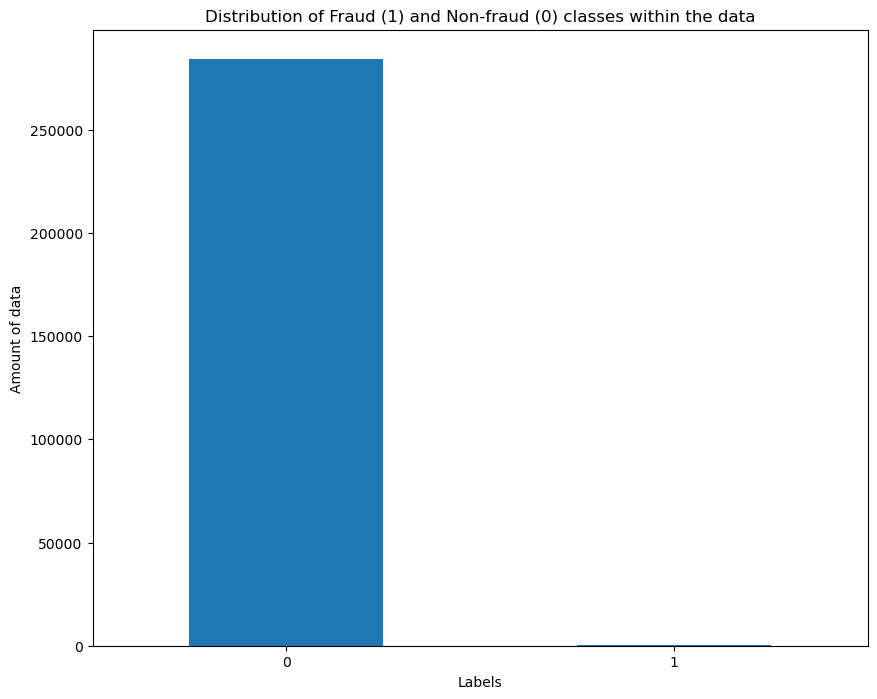

In [14]:
fig = plt.figure(figsize = (10, 8))

num_classes = data['Class'].value_counts()
num_classes.plot(kind='bar', rot=0)
plt.title ("Distribution of Fraud (1) and Non-fraud (0) classes within the data")
plt.xlabel ("Labels")
plt.ylabel ("Amount of data")

# Data Preparation

As all features and the label are numerical variables, there is no need to use One Hot Encoding. However, the authors of the datset warn that it is highly unbalanced: there are 492 frauds about of 284,315 transactions (only 0.172% of the total ‘Class’ labels).

Doing a quick search, one possible solution could be oversampling/undersampling the minority/majority class (respectively) or applying SMOTE (Synthetic Minority Oversampling Technique using k nearest neighbour). This means resampling the entire dataset, in order to increase the imbalanced class or reduce the overbalanced class.

#### 1. Undersampling method

In [15]:
from sklearn.utils import resample

Create 2 different dataframes, each one representing the majority (0) and minority (1) classes

In [16]:
# majority and minority classes
data_majority = data[(data['Class']==0)] 
data_minority = data[(data['Class']==1)] 

Undersample the majority class

In [17]:
# undersampling
# n_samples in majority class = 492
data_majority_undersampled = resample(data_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 492, # to match majority class
                                 random_state=42)  # reproducible results

Combine the undersampled majority dataframe with the minority class

In [18]:
# Combine minority class with undersampled majority class
data_undersampled = pd.concat([data_majority_undersampled, data_minority])

Let's print out the results and show them as a bar plot

In [34]:
data_undersampled['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

Text(0, 0.5, 'Amount of data')

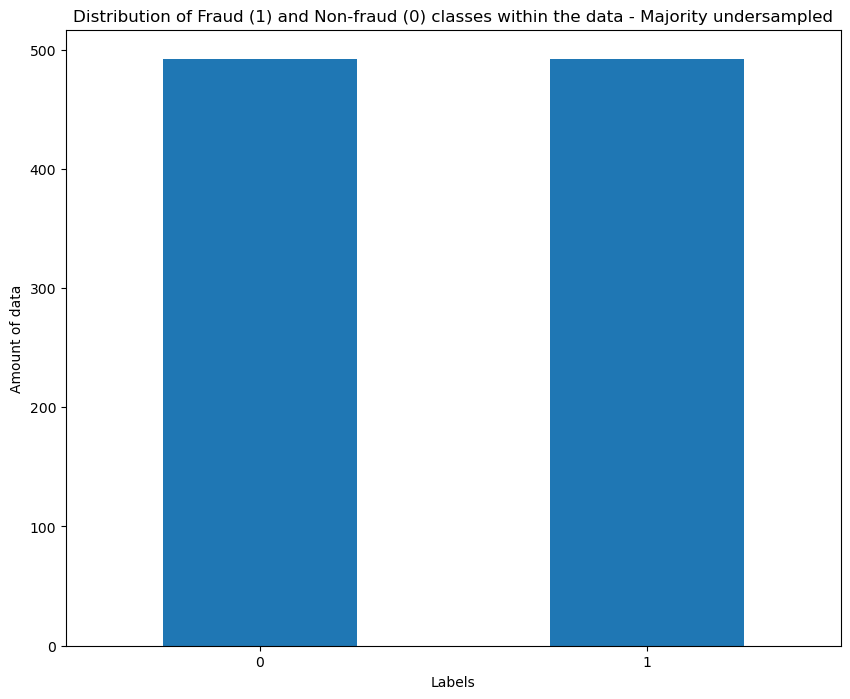

In [19]:
fig = plt.figure(figsize = (10, 8))

num_classes = data_undersampled['Class'].value_counts()
num_classes.plot(kind='bar', rot=0)
plt.title ("Distribution of Fraud (1) and Non-fraud (0) classes within the data - Majority undersampled")
plt.xlabel ("Labels")
plt.ylabel ("Amount of data")

#### 2. Oversampling method

Create 2 different dataframes, each one representing the majority (0) and minority (1) classes

In [20]:
# majority and minority classes
data_majority = data[(data['Class']==0)] 
data_minority = data[(data['Class']==1)] 

Oversample the minority class

In [21]:
# oversampling
# n_samples in majority class = 284315
data_minority_oversampled = resample(data_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 284315, # to match majority class
                                 random_state=42)  # reproducible results

Combine the upsampled minority dataframe with the majority class

In [22]:
# Combine majority class with upsampled minority class
data_oversampled = pd.concat([data_minority_oversampled, data_majority])

Let's print out the results and show them as a bar plot

In [36]:
data_oversampled['Class'].value_counts()

1    284315
0    284315
Name: Class, dtype: int64

Text(0, 0.5, 'Amount of data')

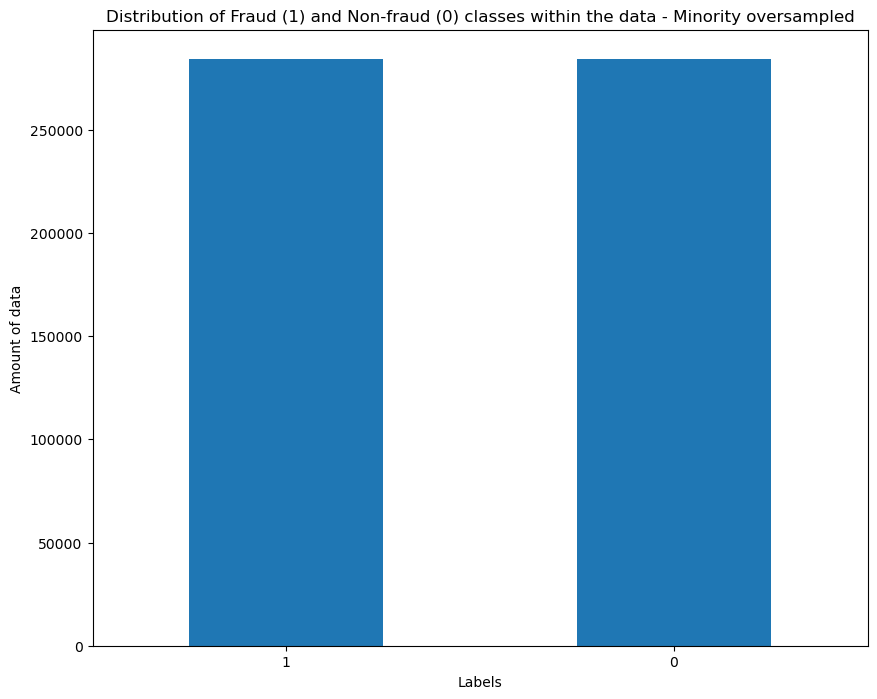

In [23]:
fig = plt.figure(figsize = (10, 8))

num_classes = data_oversampled['Class'].value_counts()
num_classes.plot(kind='bar', rot=0)
plt.title ("Distribution of Fraud (1) and Non-fraud (0) classes within the data - Minority oversampled")
plt.xlabel ("Labels")
plt.ylabel ("Amount of data")

#### 3. SMOTE (Synthetic Minority Oversampling Technique) method

In SMOTE new instances are synthesized from preexisting data using k-nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space. It is basicaly an oversampling method.

In [24]:
%pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)

In [32]:
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(data.drop('Class', axis=1), data['Class'])
data_oversampled_smote = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [37]:
data_oversampled['Class'].value_counts()

1    284315
0    284315
Name: Class, dtype: int64

Text(0, 0.5, 'Amount of data')

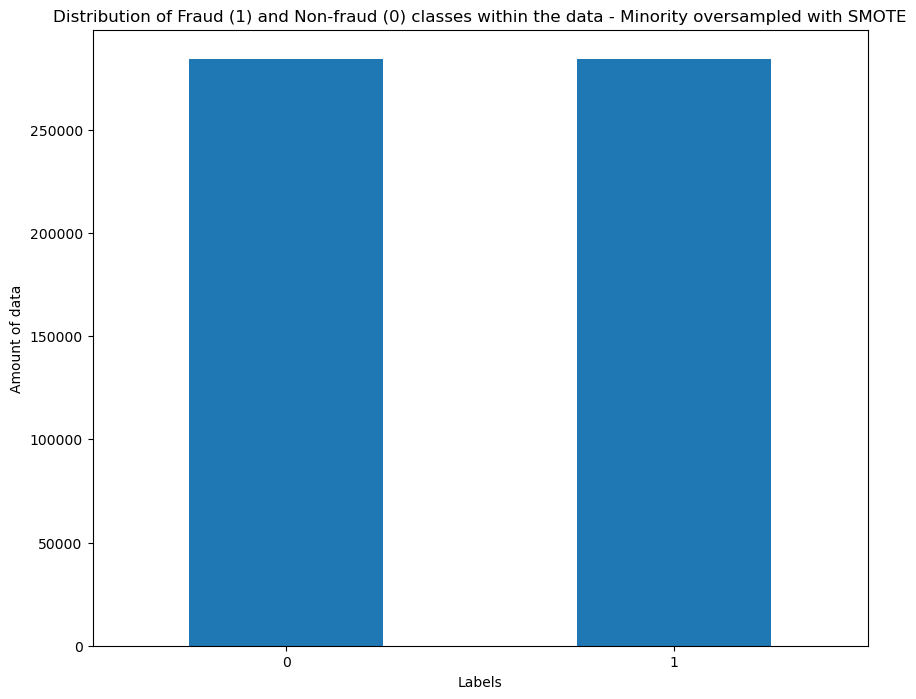

In [33]:
fig = plt.figure(figsize = (10, 8))

num_classes = data_oversampled_smote['Class'].value_counts()
num_classes.plot(kind='bar', rot=0)
plt.title ("Distribution of Fraud (1) and Non-fraud (0) classes within the data - Minority oversampled with SMOTE")
plt.xlabel ("Labels")
plt.ylabel ("Amount of data")

# Modeling

Once we have analyzed and resampled our unbalanced data, it is necessary to split it into training, validation and test data sets that will be used in a few models so we can compare the metrics between them and establish which one fits better our data.

First, define X (features) and y (label)

In [41]:
y = data['Class']
X = data.drop(['Class'], axis=1)

In [42]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [43]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# Split data in train and remnant sets
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

In [46]:
# Split remnant data in validation and test sets
# Each set represents 10% of the original dataset, making it a total of 20%.
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

Logistic Regression model, knowing it’s used to predict categorical target variables through linear combination of the selected features.

Random Forest Classifier model, also known to solve regression or classification problems (I need to differentiate between fraud and no fraud).

Support Vector Machine model, effective in high dimensional spaces (dataset consists of 30 features).

Target variable is the column called ‘Class’, where 1 represents fraud and 0 the opposite. We will predict if a transaction is fraud or not, so the output is a categorical variable.

# Evaluation

The authors recommend measuring accuracy through the Area Under the Precision-Recall Curve, given the unbalanced nature of the dataset. The rest of the traditional metrics will be incorporated (precision, F1-score, recall).